<h4> Session 7 </h4>

<h3><i><b>Analysis of CODE3</b></i></h2>
<I>

---

**Target:**


1.   Training the model under **less iterations** and restructuring the architecture for **less trainiable parameters** or complexity.


**Results:**

1.   Parameters: 10546
2.   Best Train Acc: 98.99(15th epoch)
3.   Best Test Acc: 98.84(in 15 th epoch)
4.   Difference : More train accuracy - Small overfit scenario
5.   Epoch - 15



**Analysis:**

1.   Model looks a bit overfit.
2.   Architecture looks simple overall and can be improved upon to attain good accuracy and prevent overfitting.



---


### Imports <hr>

In [1]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

import sys
sys.path.append('../')

# Loading classes from py files
from model import Net, ModelTraining
from utils import Utility

Class Object Initialization

In [2]:
# creating class objects
get_utilitites= Utility()

model_train = ModelTraining()

##### Check device support CPU/GPU <hr> 

In [3]:
device = Utility.set_cuda_if_available()
print(f'Device available for the script - {device}')

if device:
  torch.cuda.manual_seed(1)

CUDA Available? <function is_available at 0x000001FCB66B3E20>
Device available for the script - cuda


##### Define dataset class for creating train/test loaders <hr>


In [4]:
class Dataset():
    """
    This class defines the train/test transforms for our CNN model for MNIST dataset
    """
    def __init__(self, batch_size):
        
        self.batch_size = batch_size
        self.kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

        self.train_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])

        # Test data transformations
        self.test_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            ])

    def train_loader(self):
        train = datasets.MNIST('../data', train=True, download=True, transform=self.train_transforms)
        return torch.utils.data.DataLoader(train, **self.kwargs)

    def test_loader(self):
        test = datasets.MNIST('../data', train=False, download=True, transform=self.test_transforms)
        return torch.utils.data.DataLoader(test, **self.kwargs)

##### Create Batch loader for train/test dataset  <hr>

In [5]:
get_data = Dataset(batch_size=128)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

##### View sample images from the train loader  <hr>



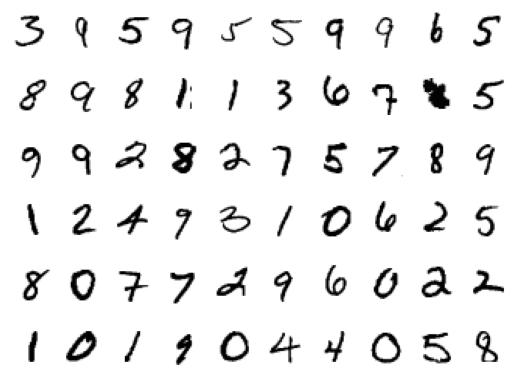

In [6]:
get_utilitites.plot_grid(train_loader)

##### CNN Model summary  <hr>


In [7]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
            Conv2d-3           [-1, 12, 26, 26]             864
              ReLU-4           [-1, 12, 26, 26]               0
            Conv2d-5           [-1, 14, 24, 24]           1,512
              ReLU-6           [-1, 14, 24, 24]               0
         MaxPool2d-7           [-1, 14, 12, 12]               0
            Conv2d-8            [-1, 8, 12, 12]             112
              ReLU-9            [-1, 8, 12, 12]               0
           Conv2d-10           [-1, 12, 10, 10]             864
             ReLU-11           [-1, 12, 10, 10]               0
           Conv2d-12           [-1, 14, 10, 10]           1,512
             ReLU-13           [-1, 14, 10, 10]               0
        MaxPool2d-14             [-1, 1

#### Let's Train and test our model
---


In [8]:
# variable for model and training
num_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train.train(model, device, train_loader, optimizer)
  model_train.test(model, device, test_loader)


Epoch 1


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.3022, Accuracy: 1573/10000 (15.73%)

Epoch 2


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 2.1687, Accuracy: 4214/10000 (42.14%)

Epoch 3


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1107, Accuracy: 9642/10000 (96.42%)

Epoch 4


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0766, Accuracy: 9765/10000 (97.65%)

Epoch 5


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0558, Accuracy: 9830/10000 (98.30%)

Epoch 6


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0571, Accuracy: 9811/10000 (98.11%)

Epoch 7


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0487, Accuracy: 9833/10000 (98.33%)

Epoch 8


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0414, Accuracy: 9856/10000 (98.56%)

Epoch 9


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0481, Accuracy: 9852/10000 (98.52%)

Epoch 10


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0433, Accuracy: 9855/10000 (98.55%)

Epoch 11


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0434, Accuracy: 9864/10000 (98.64%)

Epoch 12


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0393, Accuracy: 9866/10000 (98.66%)

Epoch 13


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0364, Accuracy: 9889/10000 (98.89%)

Epoch 14


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0362, Accuracy: 9884/10000 (98.84%)

Epoch 15


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0372, Accuracy: 9884/10000 (98.84%)



Plot the Loss/Accuracy for Train/Test dataset

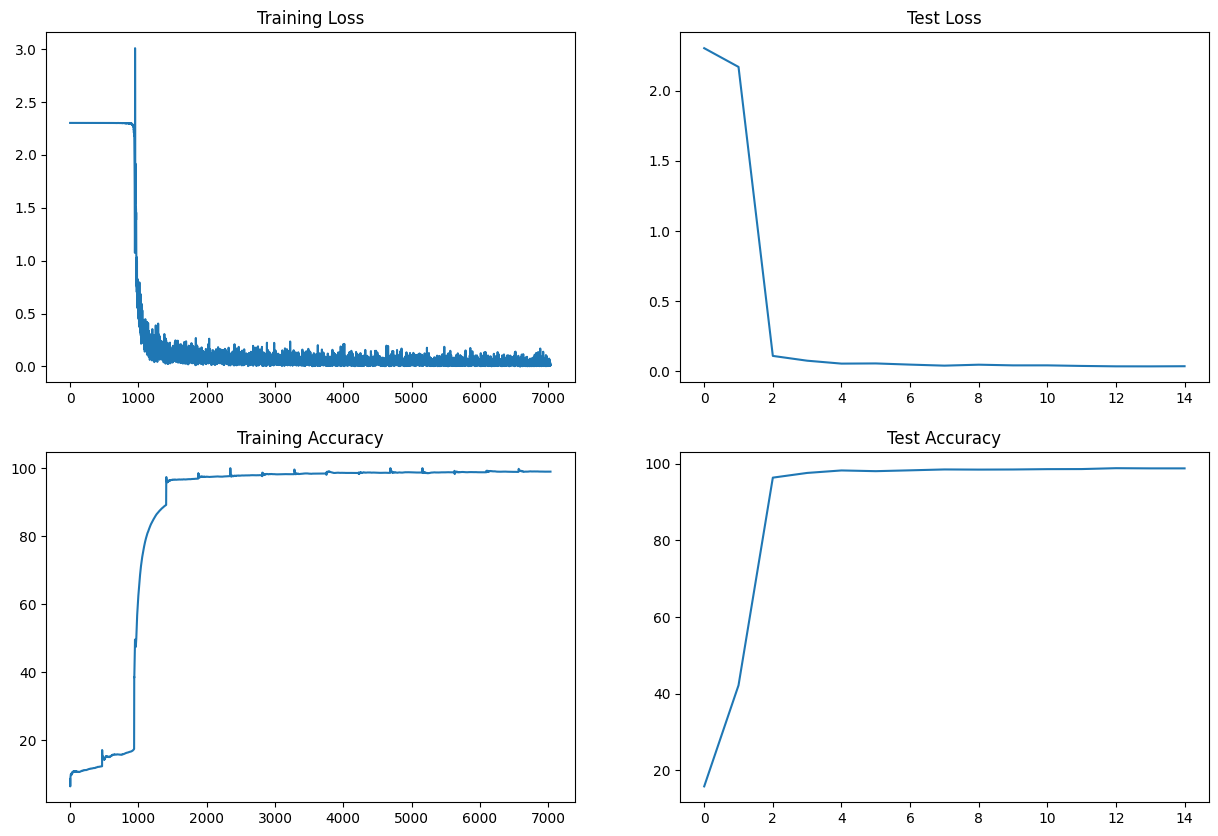

In [9]:
# CODE MOVED TO UTILS.PY

model_train.plot_loss_accuracy()